# Data Wrangling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [2]:
csv = pd.read_csv('AB_NYC_2019.csv')
csv.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Checking the length of the dataframe

len(csv)

48895

In [4]:
csv.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
# Checking the available features and their summary of statistics
# As we can see, most are non-categorical values
# And the categorical variables are 'name,' 'host_name,' 'neighbourhood_group,' 'neighbourhood,' 'room_type,' and 'last_review.'
# The distinct values of the categorical variables are also shown below

csv.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [6]:
# Dropping features that I think are irrelevant
# The variable 'id' and 'host_id' serve no purpose other than identifying the host and property
# The 'last_review' is just the last date the property was given a review and is NaN if no renter had left a review
# 'name' and 'host_name,' we should assume that the name plays no role in determining the stay rate 

raw_data = csv.drop(['id', 'host_id', 'last_review', 'name', 'host_name'], axis=1)

raw_data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [7]:
raw_data.describe(include='all')

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
unique,5,221,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN
freq,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000


# Missing Variables

In [8]:
# Checking how many NaN we have in my dataset

raw_data.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
raw_data.describe(include='all')

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
unique,5,221,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN
freq,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000


In [10]:
# Before we fill the Null with the mean of that feature, it came to my mind to check on the nature of the Nulls
# Trying to see what kind of number_of_reviews are corresponding to the reviews_per_month Nulls

raw_data[['number_of_reviews', 'reviews_per_month']][raw_data['reviews_per_month'].isnull()]

,number_of_reviews,reviews_per_month
2,0,NaN
19,0,NaN
26,0,NaN
36,0,NaN
38,0,NaN
193,0,NaN
204,0,NaN
260,0,NaN
265,0,NaN
267,0,NaN


In [11]:
# Although there are only roughly 10,000 Nulls to check, I realized it isn't always realistic with even larger dataset
# So I thought we can pull the summary statistics that meets the criteria

raw_data[['number_of_reviews']][raw_data['reviews_per_month'].isnull()].describe()

,number_of_reviews
count,10052.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [12]:
# Just as I suspected, the reviews_per_month NaN is due to having no reviews.
# One option is to fill the Nulls with the mean of the feature by using the following code
# raw_data.reviews_per_month = raw_data.reviews_per_month.fillna(raw_data.reviews_per_month.mean())

In [13]:
# The option that makes more sense is simply fill them with 0's

data = raw_data
data.reviews_per_month = data.reviews_per_month.fillna(0)

In [14]:
# Check again to see if there are anymore Nulls

data.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [15]:
print((16+21)/len(data))

0.0007567235913692607


In [16]:
len(data)

48895

In [17]:
# Since 'name' and 'host_name' only has 16 and 21, respectively, missing variables
# That is at most 0.076% of the data, so I will just drop them

data = data.dropna()

In [18]:
data.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [19]:
data.describe(include='all')

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
unique,5,221,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN
freq,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000


In [52]:
# Saving the dataframe to CSV file

data.to_csv

<bound method DataFrame.to_csv of                                                     name         host_name  \
0                     Clean & quiet apt home by the park              John   
1                                  Skylit Midtown Castle          Jennifer   
2                    THE VILLAGE OF HARLEM....NEW YORK !         Elisabeth   
3                        Cozy Entire Floor of Brownstone       LisaRoxanne   
4       Entire Apt: Spacious Studio/Loft by central park             Laura   
5              Large Cozy 1 BR Apartment In Midtown East             Chris   
6                                        BlissArtsSpace!             Garon   
7                       Large Furnished Room Near B'way           Shunichi   
8                     Cozy Clean Guest Room - Family Apt         MaryEllen   
9                     Cute & Cozy Lower East Side 1 bdrm               Ben   
10                      Beautiful 1br on Upper West Side              Lena   
11                       Centr

# Start Here

# Storytelling

### Where Are The Airbnbs Located?

In [20]:
# I want get an idea of where are most of the data are coming from.

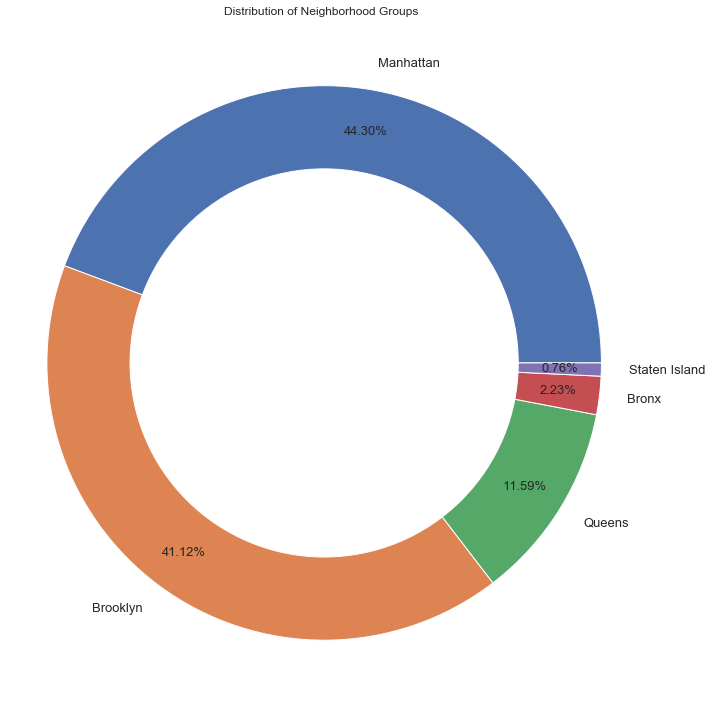

Bronx has 1091 samples.
Brooklyn has 20104 samples.
Manhattan has 21661 samples.
Queens has 5666 samples.
Staten Island has 373 samples.


In [549]:
fig,ax=plt.subplots(figsize=(10,10))
data['neighbourhood_group'].value_counts().plot.pie(pctdistance=0.85,autopct='%1.2f%%', textprops={'fontsize': 13})
ax.set_title('Distribution of Neighborhood Groups')
ax.set_ylabel('')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.show()


for x in data['neighbourhood_group'].sort_values().unique():
    print(x + ' has '+ str(len(data[data['neighbourhood_group'] == x])) + ' samples.')

#### Looking at this pie/donut chart, we can see that most of our data are located in Manhattan and Brooklyn, some in Queens and very few in Bronx and Staten Island.

### What Is The Proportion of Room Type in The 5 NY City Boroughs?

In [288]:
# Just storing this for future use
ny_boroughs = data['neighbourhood_group'].sort_values().unique()
print(ny_boroughs)

['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island']


In [289]:
# Again, just storing this for future use
room_types = data['room_type'].sort_values().unique()
print(room_types)

['Entire home/apt' 'Private room' 'Shared room']


In [341]:
# I want to display the distribution of room type for each NY City Boroughs

#Building a dictionary for the bar chart
room_type_bar = {}
for y in room_types:
    temp_list = []
    for x in ny_boroughs:
        temp_list.append(data.room_type[data['neighbourhood_group'] == x].value_counts()[y])
    room_type_bar[y]=temp_list

room_type_bar

{'Entire home/apt': [379, 9559, 13199, 2096, 176],
 'Private room': [652, 10132, 7982, 3372, 188],
 'Shared room': [60, 413, 480, 198, 9]}

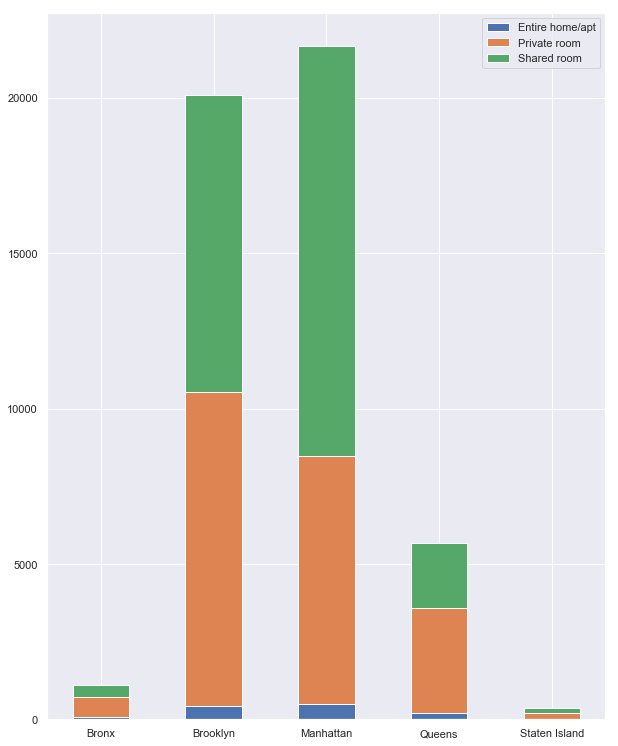

In [379]:
r = np.arange(5)
bars1 = room_type_bar['Shared room']
bars2 = room_type_bar['Private room']
bars3 = room_type_bar['Entire home/apt']
bars = np.add(bars1, bars2).tolist()

fig, ax = plt.subplots(figsize=(10,13))
ax.bar(r, bars1, edgecolor='white', width=.5)
ax.bar(r, bars2, bottom=bars1, edgecolor='white', width=.5)
ax.bar(r, bars3, bottom=bars, edgecolor='white', width=.5)

plt.xticks(r, ny_boroughs)
plt.legend(room_types)
plt.show()

#### This barchart would have been really nice if there isn't a disproportion of the most data(Manhattan & Brooklyn), and the fewest data(Bronx & Staten Island)
#### Overall, most common type of accomodation are private room and shared room.

##### Adding new insight after I produced a few more visualizations below. I noticed that Manhattan is the only borough that offer more shared room than private room, and the explanation could be because Manhattan is so much more expensive than the other boroughs, the demand for shared room is high.

### What is the pricing for each neighborhood group?

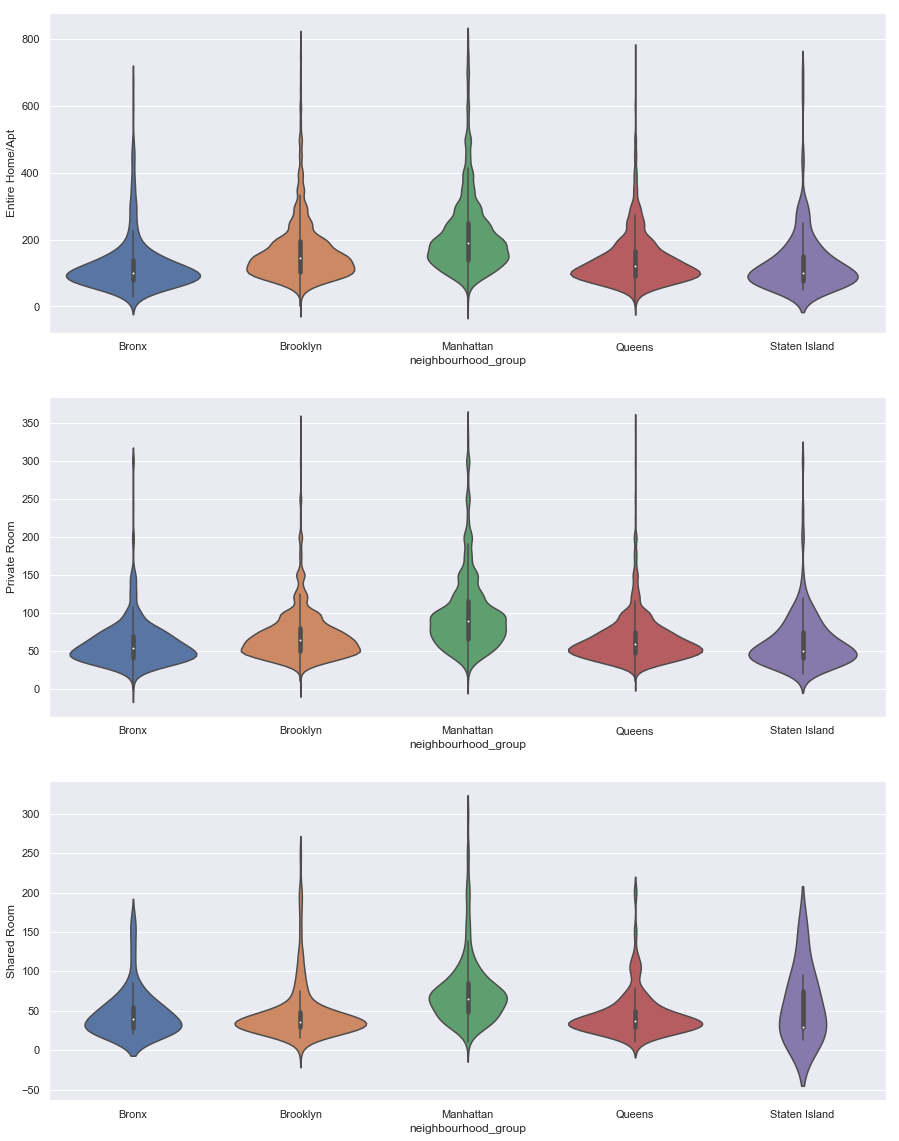

In [438]:
# From now on, I will frequently refer the room type as follow:
# eh = Entire home/apt
# pr = Private Room
# sr = Shared Room

# I have set visualized a few price points and this is a level option that will show most of the distribution of price
data_eh = data[(data['room_type'] == 'Entire home/apt') & (data['price'] < 800)].sort_values('neighbourhood_group')
data_pr = data[(data['room_type'] == 'Private room') & (data['price'] < 350)].sort_values('neighbourhood_group')
data_sr = data[(data['room_type'] == 'Shared room') & (data['price'] < 300)].sort_values('neighbourhood_group')

fig, ax = plt.subplots(nrows=3, figsize=(15,20))

violin_eh=sns.violinplot(data=data_eh, x='neighbourhood_group', y='price', ax=ax[0])
violin_pr=sns.violinplot(data=data_pr, x='neighbourhood_group', y='price', ax=ax[1])
violin_sr=sns.violinplot(data=data_sr, x='neighbourhood_group', y='price', ax=ax[2])

ax[0].set_ylabel('Entire Home/Apt')
ax[1].set_ylabel('Private Room')
ax[2].set_ylabel('Shared Room')

plt.show()

#### A boxplot seem to be easier to read, but this violin plot contains a lot more information.
#### Clearly, Manhattan is the most expensive borough.

##### Just crossed my mind that after placing a price limit, how does that affect the borough proportion on my data?

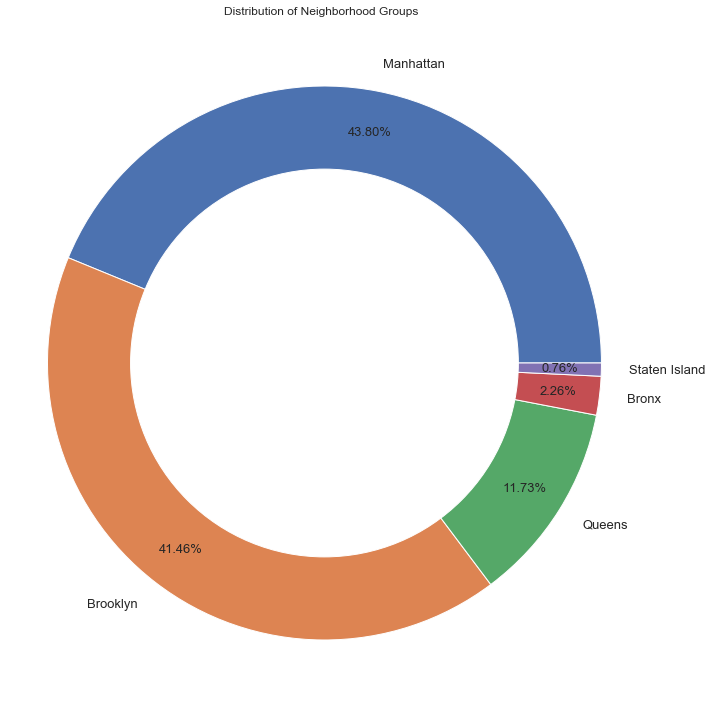

Bronx has 1086 samples.
Brooklyn has 19947 samples.
Manhattan has 21073 samples.
Queens has 5644 samples.
Staten Island has 367 samples.


In [551]:
# Rerunning my pie chart with price limit $600.00

fig,ax=plt.subplots(figsize=(10,10))
data[data['price'] <= 600]['neighbourhood_group'].value_counts().plot.pie(pctdistance=0.85,autopct='%1.2f%%', textprops={'fontsize': 13})
ax.set_title('Distribution of Neighborhood Groups')
ax.set_ylabel('')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.show()


for x in data[data['price'] <= 600]['neighbourhood_group'].sort_values().unique():
    print(x + ' has '+ str(len(data[(data['neighbourhood_group'] == x) & (data['price'] <= 600)])) + ' samples.')

#### The pie chart did not change much even after I imposed a $600.00 ceiling on the Airbnb price.

## What is the room type distribution like on the map?

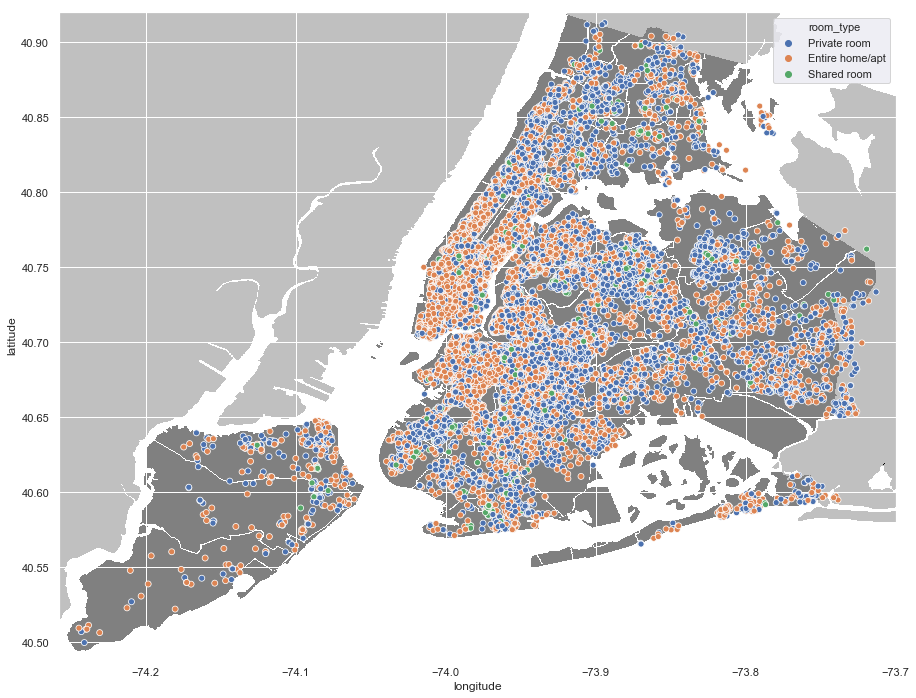

In [524]:
import urllib

plt.figure(figsize=(15,12))

i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

sns.scatterplot(data.longitude,data.latitude,hue=data.room_type, ax=ax)

plt.show()

## What is the price distribution like on the map?

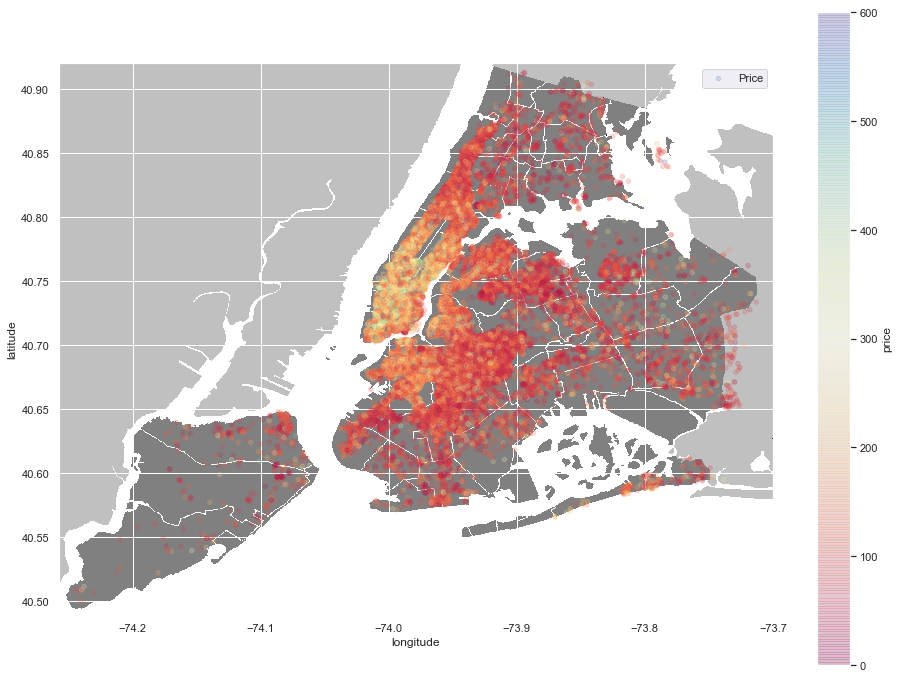

In [543]:
import urllib

plt.figure(figsize=(16,12))

# Using the finding from the violin plot, want to only include prices that make the most sense.
data_cmap = data[data['price'] <= 600]

i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
# Scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

data_cmap.plot(kind='scatter', x='longitude', y='latitude', label='Price', c='price', ax=ax, cmap=plt.get_cmap('Spectral'), colorbar=True, alpha=0.2, zorder=5)
plt.legend()
plt.show()

## Using folium to create an interactive map with defined attributes.

In [487]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins

base_map=folium.Map([40.693943, -73.985880],zoom_start=12)

base_map_rooms=plugins.MarkerCluster().add_to(base_map)

max_price = 90

min_reviews = 15

roomtype = 'Private room'

borough = 'Manhattan'

map_data = data[(data['price'] <= max_price) & (data['number_of_reviews'] >= min_reviews) & (data['room_type'] == roomtype) & (data['neighbourhood_group'] == borough)]

for lat,lon,pr in zip(map_data.latitude,map_data.longitude,map_data.price):
    folium.Marker(location=[lat,lon],icon=folium.Icon(color='red', icon='info-sign'),popup=('$'+ str(pr))).add_to(base_map_rooms)
base_map.add_child(base_map_rooms)

base_map